In [1]:
import sys
sys.path.append("../..") 

In [2]:
import glob,os
import pandas as pd
import matplotlib.pyplot as plt
import torch
import seaborn as sns
import numpy as np

In [3]:
# args
RES_PATH = "../../experiments/simulations/measurement_error/"

In [4]:
def get_metrics_from_folder(path):
    df_tests = []
    for folder in os.listdir(path):
        if folder.startswith('.') == False:
            pathm = os.path.join(path, folder, "metrics.csv")
            pathc = os.path.join(path, folder, "checkpoints/")
            paths = os.path.join(path, folder, "settings.csv")
            # model name:
            for _, _, files in os.walk(pathc):
                file = [f for f in files if f.endswith('.ckpt')][0]
                chk_path = os.path.join(pathc,file)
            checkpoint = torch.load(chk_path)
            model_name = checkpoint["hyper_parameters"]['net']
            hidden_dim_t = checkpoint["hyper_parameters"]['hidden_dims']
            # sim settings
            settings = pd.read_csv(paths)
            # model results:
            df = pd.read_csv(pathm)
            df_test = df.loc[:,df.columns.str.startswith('test') | df.columns.str.startswith('int')]
            df_test = df_test.dropna()
            df_test.loc[:,'model'] = model_name
            df_test.loc[:,'N'] = settings.N.item()
            df_test.loc[:,'sim_error'] = settings.sim_error.item()
            df_test.loc[:,'loss'] = settings.loss.item()
            df_tests.append(df_test)
        df_test = pd.concat(df_tests, axis=0)
    return df_test

In [5]:
df_test = get_metrics_from_folder(RES_PATH)

In [6]:
df_test

,test_loss,test_loss_pred,test_loss_update,test_rmse,test_var_pit,test_crps,test_ignorance,test_int_score,int_coverage,int_med_width,int_av_width,model,N,sim_error,loss
2520,-2.303887,-2.126961,-2.921207,4.113992,0.087108,0.016209,1.950034,0.136929,0.936925,13.539612,14.988475,ODEGRUBayes,10000,0.5,LL
1595,-2.007766,-1.840712,-2.674424,6.399196,0.084510,0.025843,1.673658,0.215218,0.947318,23.251305,24.691391,ctGRUModel,10000,1.0,LL
1120,-2.398974,-2.243005,-2.759177,4.343426,0.077492,0.017280,2.087036,0.146698,0.947828,15.099258,16.810272,ctRNNModel,10000,0.5,LL
2800,-2.022819,-1.847400,-2.765600,6.399698,0.082148,0.025851,1.671981,0.215582,0.953768,24.135101,25.347391,ctRNNModel,10000,1.0,LL
2800,-2.439948,-2.290511,-2.714345,4.190239,0.083968,0.016460,2.141074,0.137826,0.948251,14.317032,15.872157,ODEGRUBayes,10000,0.5,LL
587,-2.531491,-2.321151,-3.369153,4.319138,0.090477,0.016919,2.110810,0.144028,0.929398,13.428009,15.144845,ODEGRUBayes,10000,0.5,KL
2800,-2.512156,-2.333257,-3.045068,4.101501,0.083756,0.016187,2.154358,0.135772,0.947428,13.956497,15.578367,ctLSTMModel,10000,0.5,LL
643,-2.545812,-2.327157,-3.459450,4.308048,0.089677,0.016964,2.108503,0.144690,0.929282,13.332565,15.136565,ODEGRUBayes,10000,0.5,KL
1259,-2.114221,-2.003863,-2.160685,5.114373,0.085271,0.020501,1.893506,0.179135,0.931400,17.916245,18.421282,neuralJumpModel,10000,0.5,LL
1091,-2.383235,-2.246645,-2.557518,4.272192,0.080882,0.016928,2.110055,0.143661,0.952384,14.889526,16.617834,IMODE,10000,1.0,LL


In [7]:
d = {'neuralJumpModel':'NJ-ODE',
     'ctRNNModel':'ODE-RNN',
     'ctGRUModel':'ODE-GRU',
     'ctLSTMModel':'ODE-LSTM',
     'ODEGRUBayes':'ODE-GRU-Bayes (LL)',
     'resNeuralJumpModel':'rNJ-ODE',
     'IMODE':'IMODE'}

In [8]:
df_test['model_name'] = [d[m] for m in df_test.model]

In [9]:
# fix an error
df_test.loc[(df_test.N == 10000) & (df_test.sim_error == 1.0) & (df_test.model == 'IMODE'),'sim_error'] = 0.5

In [10]:
df_test = df_test.loc[(df_test.N == 10000) & (df_test.sim_error == 0.5),:]

In [11]:
df_test_ll = df_test.loc[df_test.loss == 'LL',:]
df_test_kl = df_test.loc[df_test.loss == 'KL',:]

In [12]:
headline_metrics = ['test_rmse','test_crps','test_int_score','int_coverage']
metric_cols = ['test_loss_update','test_rmse','test_var_pit','test_crps','test_ignorance','test_int_score',
               'int_coverage','int_med_width','int_av_width']

In [13]:
df_test_ll.loc[:,headline_metrics + ["model_name","sim_error"]].groupby(["model_name","sim_error"]).agg(["mean","std"])

test_rmse           test_crps            \
                             mean       std      mean       std   
model_name    sim_error                                           
IMODE         0.5        4.210446  0.053683  0.016638  0.000251   
NJ-ODE        0.5        5.012247  0.088768  0.020000  0.000435   
ODE-GRU       0.5        4.215231  0.068070  0.016659  0.000321   
ODE-GRU-Bayes 0.5        4.270580  0.208698  0.016892  0.000975   
ODE-LSTM      0.5        4.116029  0.022465  0.016262  0.000115   
ODE-RNN       0.5        4.228008  0.107531  0.016690  0.000531   
rNJ-ODE       0.5        4.217772  0.009810  0.016640  0.000042   

                        test_int_score           int_coverage            
                                  mean       std         mean       std  
model_name    sim_error                                                  
IMODE         0.5             0.140229  0.002992     0.953144  0.001869  
NJ-ODE        0.5             0.172717  0.005645     0.940659  0.008030  
ODE-GRU       0.5             0.140265  0.003642     0.947986  0.003413  
ODE-GRU-Bayes 0.5             0.142474  0.008837     0.942880  0.005685  
ODE-LSTM      0.5             0.136383  0.001349     0.947428  0.001492  
ODE-RNN       0.5             0.140106  0.005752     0.947507  0.001562  
rNJ-ODE       0.5             0.140204  0.001515     0.944704  0.003855

In [14]:
df_test_kl.loc[:,headline_metrics + ["model_name","sim_error"]].groupby(["model_name","sim_error"]).agg(["mean","std"])

test_rmse           test_crps          test_int_score  \
                             mean       std      mean      std           mean   
model_name    sim_error                                                         
ODE-GRU-Bayes 0.5        4.317928  0.009334   0.01698  0.00007        0.14519   

                                  int_coverage            
                              std         mean       std  
model_name    sim_error                                   
ODE-GRU-Bayes 0.5        0.001477     0.932186  0.004929

In [ ]:
hue_order = ['NJ-ODE', 'rNJ-ODE','ODE-SRN','ODE-GRU','ODE-GRU-Bayes (LL)','ODE-GRU-Bayes (KL)', 'ODE-LSTM','IMODE']

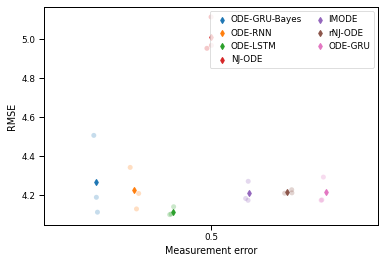

In [15]:
sns.set_context("paper")
f, ax = plt.subplots()
sns.stripplot(x="sim_error", y="test_rmse", hue="model_name",hue_order=hue_order,data=df_test_ll,dodge=True,alpha=.25,zorder=1)
sns.pointplot(x="sim_error", y="test_rmse", hue="model_name",hue_order=hue_order,data=df_test_ll,join=False, dodge=.8 - .8 / 7,
              markers="d", scale=.75, ci=None)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[7:], labels[7:], title="", handletextpad=0, columnspacing=1,
          loc="upper right", ncol=2, frameon=True)
ax.set_xlabel('Measurement error')
ax.set_ylabel('RMSE')
f.savefig('../../results/sim_measurement_error.png', dpi=300)
plt.show()

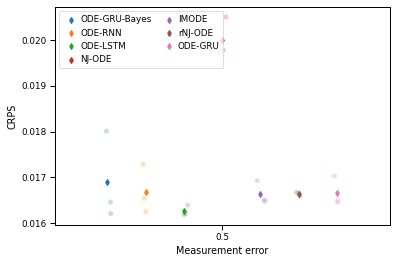

In [20]:
sns.set_context("paper")
f, ax = plt.subplots()
sns.stripplot(x="sim_error", y="test_crps", hue="model_name",hue_order=hue_order,data=df_test_ll,dodge=True,alpha=.25,zorder=1)
sns.pointplot(x="sim_error", y="test_crps", hue="model_name",hue_order=hue_order,data=df_test_ll,join=False, dodge=.8 - .8 / 7,
              markers="d", scale=.75, ci=None)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[7:], labels[7:], title="", handletextpad=0, columnspacing=1,
          loc="upper right", ncol=2, frameon=True)
ax.set_xlabel('Measurement error')
ax.set_ylabel('CRPS')
f.savefig('../../results/sim_measurement_error_crps.png', dpi=300)
plt.show()

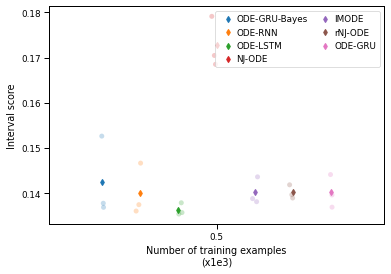

In [17]:
sns.set_context("paper")
f, ax = plt.subplots()
sns.stripplot(x="sim_error", y="test_int_score", hue="model_name",hue_order=hue_order,data=df_test_ll,dodge=True,alpha=.25,zorder=1)
sns.pointplot(x="sim_error", y="test_int_score", hue="model_name",hue_order=hue_order,data=df_test_ll,join=False, dodge=.8 - .8 / 7,
              markers="d", scale=.75, ci=None)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[7:], labels[7:], title="", handletextpad=0, columnspacing=1,
          loc="upper right", ncol=2, frameon=True)
ax.set_xlabel('Number of training examples\n(x1e3)')
ax.set_ylabel('Interval score')
f.savefig('../../results/sim_measurement_error_int_score.png', dpi=300)
plt.show()

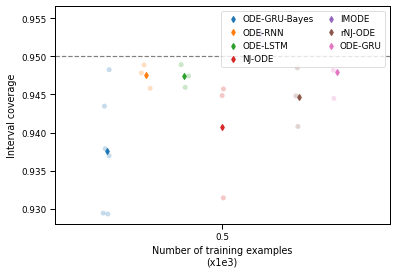

In [18]:
sns.set_context("paper")
f, ax = plt.subplots()
ax.axhline(0.95,ls='--',color="black",alpha=0.5)
sns.stripplot(x="sim_error", y="int_coverage", hue="model_name",hue_order=hue_order,data=df_test,dodge=True,alpha=.25,zorder=1)
sns.pointplot(x="sim_error", y="int_coverage", hue="model_name",hue_order=hue_order,data=df_test,join=False, dodge=.8 - .8 / 7,
              markers="d", scale=.75, ci=None)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[7:], labels[7:], title="", handletextpad=0, columnspacing=1,
          loc="upper right", ncol=2, frameon=True)
ax.set_xlabel('Number of training examples\n(x1e3)')
ax.set_ylabel('Interval coverage')
f.savefig('../../results/sim_measurement_error_int_score.png', dpi=300)
plt.show()

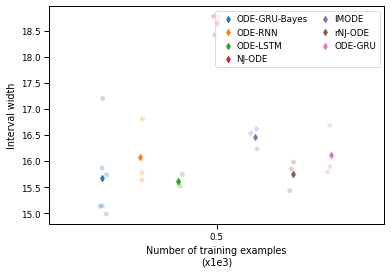

In [19]:
sns.set_context("paper")
f, ax = plt.subplots()
sns.stripplot(x="sim_error", y="int_av_width", hue="model_name",hue_order=hue_order,data=df_test,dodge=True,alpha=.25,zorder=1)
sns.pointplot(x="sim_error", y="int_av_width", hue="model_name",hue_order=hue_order,data=df_test,join=False, dodge=.8 - .8 / 7,
              markers="d", scale=.75, ci=None)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[7:], labels[7:], title="", handletextpad=0, columnspacing=1,
          loc="upper right", ncol=2, frameon=True)
ax.set_xlabel('Number of training examples\n(x1e3)')
ax.set_ylabel('Interval width')
f.savefig('../../results/sim_measurement_error_int_av_width.png', dpi=300)
plt.show()